# Aim
Generate A few small graphs varying in number of even degree nodes

Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

#################
# My notebook issues
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
sys.path.append('home/egupta/.local/bin')

##############

import os
import numpy as np
import scipy.stats as ss
import networkx as nx
import csv 
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
import scipy
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline


##qtensor imports
import qtensor
from qtensor import QAOA_energy
from qtensor import parameter_optimization as popt
import torch

2021-08-02 08:37:11,992- WARNING•	QuickBB solver is unavailable
2021-08-02 08:37:11,993- WARNING•	Tamaki solver is unavailable: No path /home/egupta/.local/lib/python3.7/site-packages/thirdparty/tamaki_treewidth


#### Important Functions

In [2]:
def get_qaoa_params(graph, edge=None, gamma=[0.5], beta=[0.5], steps=50):
    loss_history, params_history = popt.qaoa_maxcut_torch(graph, gamma, beta,
                                                          ordering_algo='greedy',
                                                          Opt=torch.optim.RMSprop,
                                                          edge=edge,
                                                          opt_kwargs=dict(lr=0.002),
                                                          steps=steps,
                                                          pbar=False)
    best_ix = np.argmin(loss_history)
    return params_history[best_ix], loss_history[best_ix]

def get_edge_contribution(graph, edge, gamma, beta):
    sim = qtensor.QtreeSimulator()
    composer = qtensor.DefaultQAOAComposer(graph, gamma=gamma, beta=beta)
    composer.energy_expectation_lightcone(edge)
    return np.real(sim.simulate_batch(composer.circuit)[0])



def opt_runs(G, seeds = 20, steps = 200):
  """
  Doing multiple optimization runs, each with random initialized param
  Returning results which inlclude the optimal param and corresponding energies
  """

  #first do 20 optimization runs 
  s = 0
  g_results = []

  while s<seeds:
    print('seed #' + str(s))
    #initialize param
    gamma = [np.random.rand()]
    beta = [np.random.rand() ]
    initial_energy = QAOA_energy(G,gamma =  gamma, beta = beta)

    #optimization
    params, loss = get_qaoa_params(G, gamma=gamma, beta=beta,edge = None, steps=steps)
    #print('Finished get_qaoa_params')
    gamma_opt, beta_opt = params[0], params[1]
    opt_energy = QAOA_energy(G, gamma = gamma_opt, beta = beta_opt)

    result = np.asarray([float(gamma_opt), float(beta_opt), float(opt_energy), float(initial_energy)])
    g_results.append(result)
    s+=1

  
  return g_results

# Create Graphs

In [48]:
import random
def generate_deg_seq(even_nodes, total_nodes):
  """
  Generates a degree sequence with specified number of even degree nodes
  Highest degree = 6
  lowest degree = 1
  """
  even = [2,4,6]
  odd = [1,3,5]
  deg_seq = []
    
  ########################## edit: fixing even and off if total nodes<20
  n_even = []
  n_odd = []
  for i in even:
      if i+1 <= total_nodes:
          n_even.append(i)
  for i in odd:
      if i+1 <= total_nodes:
          n_odd.append(i)
        
  #print(n_even)
  #print(n_odd)
  for i in range(1, total_nodes+1):
    if i<= even_nodes:
      if len(n_even) ==0:
          deg = 100
      else:
          deg = random.choice(n_even)
      deg_seq.append(deg)
    else:
      if len(n_odd) ==0:
          deg = 100
      else:
          deg = random.choice(n_odd)
      deg_seq.append(deg)
    
  return deg_seq

In [49]:
def generate_random_graph(deg_seq, g_list):
  """
  Generates a random graph with specified deg seq
  """
  g = nx.random_degree_sequence_graph(deg_seq)
  if (not nx.is_connected(g)) or (is_isomorphic_to_old(g, g_list)):
    return generate_random_graph(deg_seq, g_list)
  return g

In [50]:
def is_isomorphic_to_old(graph,g_list):
  """
  Checks if graph is iso.. to graphs already in csv file
  """
  for i in g_list:
    if nx.is_isomorphic(graph, i):
      return True
  return False

generating deg seqs and graphs

In [51]:
n = 3
j = 4

##############################################
2
************
0
[1, 1]


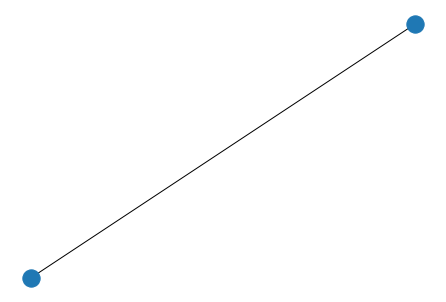

************
1
[100, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 1 try
[100, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 2 try
[100, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 3 try
[100, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 4 try
[100, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 5 try
[100, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 6 try
[100, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 7 try
[100, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 8 try
[100, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 9 try
[100, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 10 try
[100

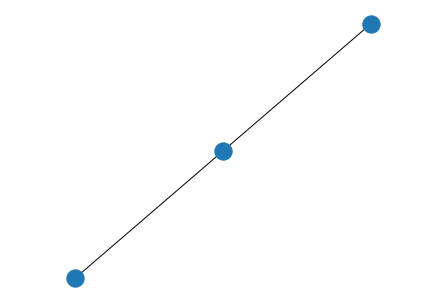

************
2
[2, 2, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 1 try
[2, 2, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 2 try
[2, 2, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 3 try
[2, 2, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 4 try
[2, 2, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 5 try
[2, 2, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 6 try
[2, 2, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 7 try
[2, 2, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 8 try
[2, 2, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 9 try
[2, 2, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 1

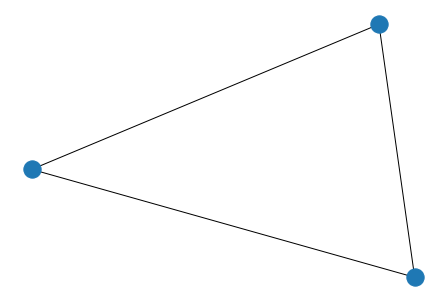

##############################################
4
************
0
[3, 3, 1, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 1 try
[1, 3, 1, 1]


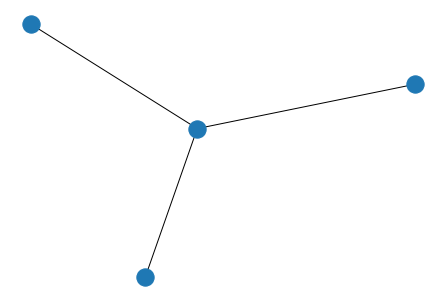

************
1
[2, 1, 1, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 1 try
[2, 1, 3, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 2 try
[2, 3, 1, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 3 try
[2, 3, 1, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 4 try
[2, 3, 3, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 5 try
[2, 3, 3, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 6 try
[2, 1, 3, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 7 try
[2, 3, 3, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 8 try
[2, 3, 1, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 9 try
[2, 3, 1, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> 

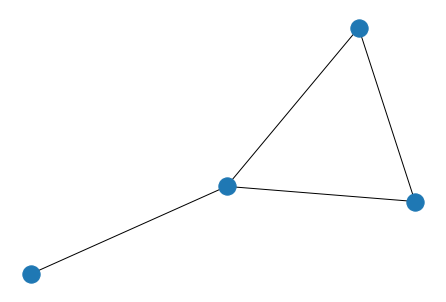

************
3
[2, 2, 2, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 1 try
[2, 2, 2, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 2 try
[2, 2, 2, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 3 try
[2, 2, 2, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 4 try
[2, 2, 2, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 5 try
[2, 2, 2, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 6 try
[2, 2, 2, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 7 try
[2, 2, 2, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 8 try
[2, 2, 2, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 9 try
[2, 2, 2, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> 

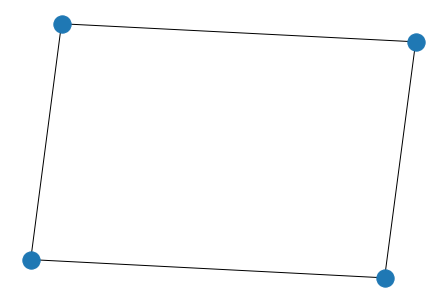

##############################################
5
************
0
[3, 1, 3, 1, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 1 try
[3, 3, 3, 1, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 2 try
[3, 3, 3, 3, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 3 try
[1, 1, 1, 3, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 4 try
[3, 1, 1, 3, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 5 try
[3, 1, 3, 3, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 6 try
[1, 1, 3, 3, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 7 try
[1, 1, 3, 3, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 8 try
[3, 3, 1, 3, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq 

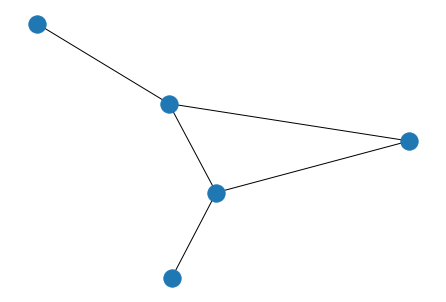

************
2
[4, 4, 3, 3, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 1 try
[2, 2, 1, 1, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 2 try
[2, 2, 3, 1, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 3 try
[2, 2, 1, 3, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 4 try
[4, 2, 1, 1, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 5 try
[4, 2, 3, 1, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 6 try
[4, 2, 3, 3, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 7 try
[4, 2, 1, 1, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 8 try
[4, 2, 3, 3, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 9 try
[4, 2, 3, 1, 3]
Oops! <class 'networkx.e

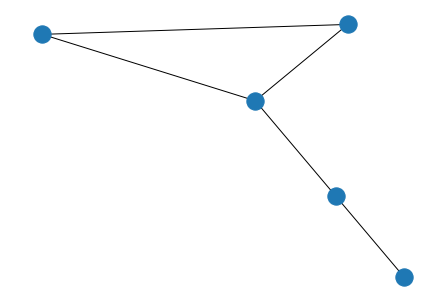

************
4
[4, 4, 2, 2, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 1 try
[2, 4, 2, 4, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 2 try
[4, 2, 2, 4, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 3 try
[4, 2, 4, 2, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 4 try
[4, 4, 4, 4, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 5 try
[2, 4, 2, 2, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 6 try
[2, 2, 2, 4, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 7 try
[4, 2, 4, 4, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 8 try
[4, 2, 4, 4, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 9 try
[4, 4, 4, 4, 3]
Oops! <class 'networkx.e

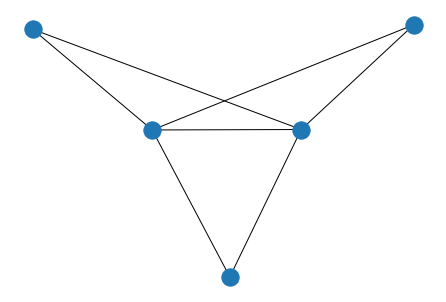

##############################################
6
************
0
[3, 3, 3, 3, 5, 5]


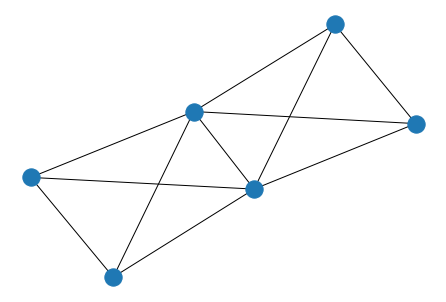

************
1
[2, 5, 5, 1, 5, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 1 try
[2, 3, 5, 3, 5, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 2 try
[2, 5, 1, 3, 5, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 3 try
[4, 5, 1, 5, 1, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 4 try
[4, 3, 3, 3, 5, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 5 try
[2, 5, 1, 3, 3, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 6 try
[2, 1, 1, 5, 3, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 7 try
[2, 1, 1, 1, 1, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 8 try
[2, 1, 1, 1, 1, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 9 try
[2, 5, 5, 1, 

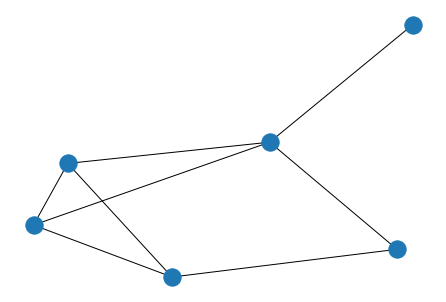

************
3
[2, 2, 2, 3, 3, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 1 try
[2, 2, 2, 5, 3, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 2 try
[4, 2, 2, 3, 5, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 3 try
[4, 4, 4, 3, 5, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 4 try
[2, 2, 4, 3, 1, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 5 try
[4, 2, 4, 3, 3, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 6 try
[2, 4, 2, 5, 5, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 7 try
[2, 2, 4, 1, 3, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 8 try
[2, 2, 4, 1, 3, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 9 try
[4, 4, 2, 1, 

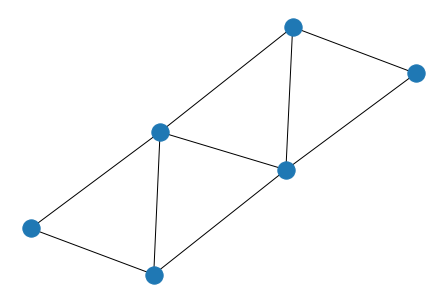

************
5
[4, 2, 4, 4, 4, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 1 try
[2, 2, 2, 4, 2, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 2 try
[4, 4, 4, 4, 2, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 3 try
[4, 4, 2, 4, 2, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 4 try
[4, 4, 2, 2, 2, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 5 try
[2, 4, 2, 4, 4, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 6 try
[4, 4, 2, 4, 2, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 7 try
[2, 2, 2, 2, 2, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 8 try
[4, 2, 4, 4, 2, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 9 try
[4, 2, 2, 4, 

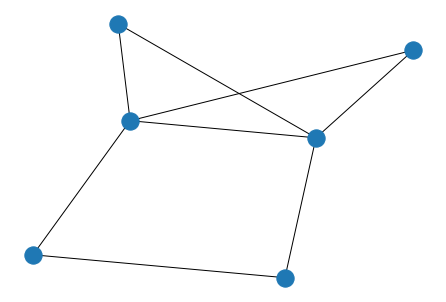

##############################################
7
************
0
[5, 5, 1, 3, 3, 5, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 1 try
[3, 1, 1, 1, 5, 5, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 2 try
[5, 3, 3, 1, 5, 3, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 3 try
[1, 3, 1, 5, 3, 3, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 4 try
[1, 5, 3, 3, 5, 1, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 5 try
[3, 5, 1, 5, 1, 1, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 6 try
[3, 5, 3, 5, 3, 5, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 7 try
[5, 3, 3, 1, 3, 1, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 8 try
[1, 3, 1, 5, 1, 1, 3]
Oops! <class 'networkx.exc

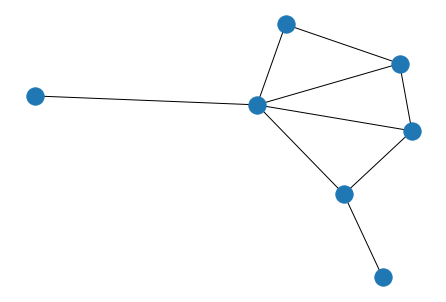

************
2
[4, 4, 5, 1, 1, 1, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 1 try
[6, 2, 3, 3, 3, 1, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 2 try
[4, 2, 5, 1, 1, 3, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 3 try
[6, 4, 1, 5, 3, 5, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 4 try
[2, 2, 1, 5, 5, 5, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 5 try
[4, 4, 3, 3, 3, 1, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 6 try
[4, 2, 3, 3, 3, 5, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 7 try
[6, 2, 5, 1, 5, 5, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 8 try
[6, 2, 3, 5, 5, 5, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg

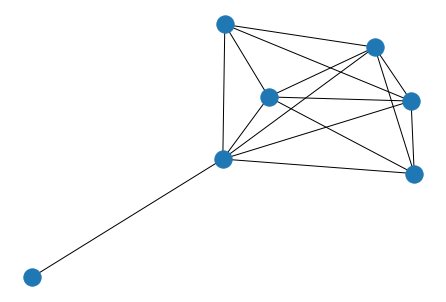

************
4
[4, 6, 6, 4, 3, 3, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 1 try
[2, 6, 2, 2, 1, 1, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 2 try
[4, 2, 2, 6, 5, 3, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 3 try
[4, 2, 6, 6, 3, 5, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 4 try
[4, 2, 2, 2, 3, 5, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 5 try
[2, 2, 6, 2, 1, 1, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 6 try
[6, 4, 2, 2, 1, 3, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 7 try
[4, 2, 2, 2, 5, 1, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 8 try
[6, 6, 2, 6, 5, 5, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg

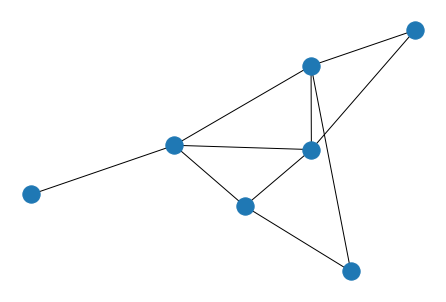

************
6
[4, 6, 6, 2, 4, 6, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 1 try
[6, 2, 4, 4, 2, 6, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 2 try
[4, 2, 2, 2, 6, 2, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 3 try
[2, 6, 4, 2, 4, 2, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 4 try
[4, 6, 6, 4, 2, 4, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 5 try
[4, 2, 6, 2, 4, 2, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 6 try
[6, 4, 6, 2, 6, 4, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 7 try
[6, 6, 6, 6, 4, 2, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 8 try
[6, 2, 4, 6, 2, 2, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg

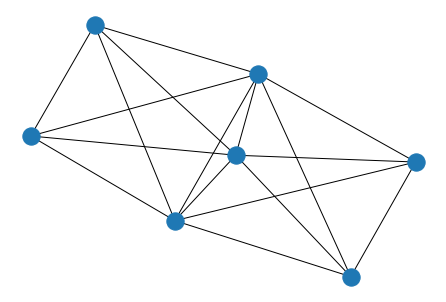

##############################################
8
************
0
[5, 5, 3, 3, 1, 3, 1, 3]


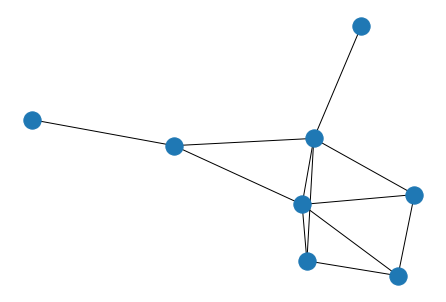

************
1
[2, 1, 5, 5, 3, 1, 1, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 1 try
[4, 3, 3, 5, 1, 5, 3, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 2 try
[4, 5, 5, 3, 1, 3, 1, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 3 try
[6, 5, 1, 3, 1, 5, 5, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 4 try
[4, 1, 1, 3, 3, 5, 1, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 5 try
[6, 3, 5, 1, 5, 1, 1, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 6 try
[6, 3, 5, 3, 3, 3, 1, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 7 try
[2, 3, 3, 3, 5, 5, 3, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 8 try
[2, 1, 1, 3, 5, 1, 5, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasi

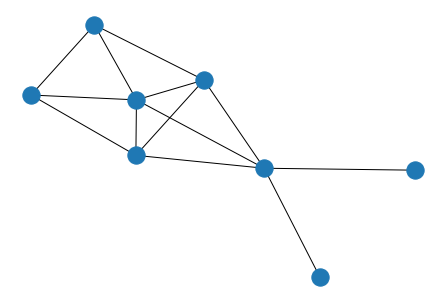

************
3
[2, 4, 2, 3, 3, 3, 1, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 1 try
[2, 4, 6, 1, 3, 5, 3, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 2 try
[2, 6, 2, 5, 3, 5, 1, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 3 try
[4, 2, 4, 5, 3, 5, 5, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 4 try
[4, 4, 4, 1, 3, 1, 1, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 5 try
[2, 6, 2, 1, 3, 1, 1, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 6 try
[2, 4, 4, 5, 3, 1, 5, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 7 try
[4, 4, 2, 5, 1, 3, 5, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 8 try
[6, 4, 2, 5, 1, 1, 5, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasi

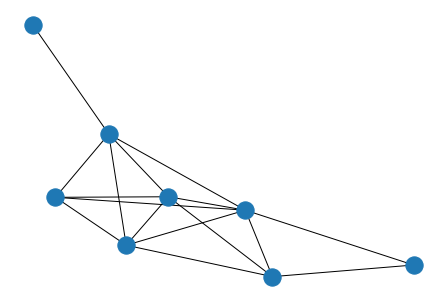

************
5
[4, 6, 4, 4, 6, 1, 3, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 1 try
[2, 6, 2, 4, 2, 3, 5, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 2 try
[2, 2, 6, 4, 2, 3, 5, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 3 try
[6, 6, 2, 6, 6, 5, 5, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 4 try
[4, 4, 4, 2, 4, 1, 3, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 5 try
[4, 2, 2, 6, 4, 1, 1, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 6 try
[6, 2, 6, 2, 4, 5, 5, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 7 try
[4, 2, 4, 2, 6, 1, 1, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 8 try
[6, 4, 6, 6, 4, 1, 3, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasi

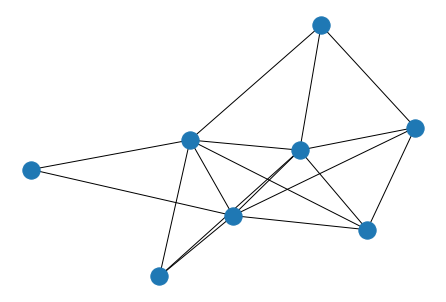

************
7
[2, 4, 4, 2, 2, 4, 4, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 1 try
[2, 6, 4, 6, 2, 4, 4, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 2 try
[2, 4, 4, 4, 6, 2, 6, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 3 try
[2, 6, 6, 2, 2, 2, 4, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 4 try
[2, 6, 2, 6, 4, 4, 2, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 5 try
[2, 6, 2, 4, 6, 2, 6, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 6 try
[6, 4, 4, 2, 2, 2, 6, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 7 try
[4, 2, 4, 4, 6, 6, 6, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 8 try
[2, 6, 6, 4, 2, 2, 2, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasi

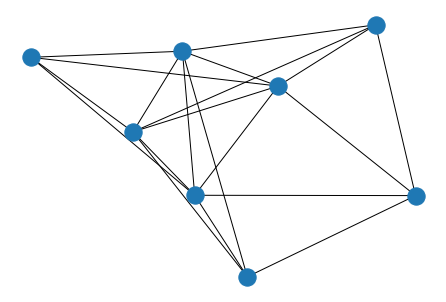

##############################################
9
************
0
[3, 5, 3, 1, 1, 5, 1, 3, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 1 try
[3, 1, 1, 1, 5, 5, 5, 1, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 2 try
[3, 1, 5, 1, 5, 1, 3, 3, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 3 try
[3, 1, 3, 5, 1, 5, 1, 5, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 4 try
[1, 5, 3, 5, 1, 3, 1, 3, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 5 try
[3, 1, 5, 1, 5, 3, 3, 5, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 6 try
[1, 3, 5, 1, 1, 3, 3, 3, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 7 try
[5, 1, 1, 1, 5, 3, 3, 5, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 8 try


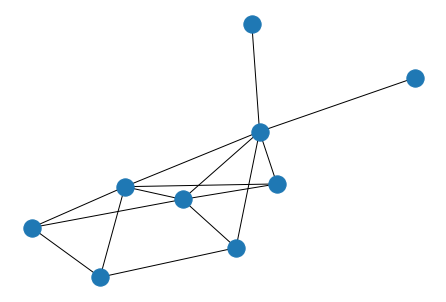

************
2
[4, 2, 1, 1, 3, 3, 3, 1, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 1 try
[6, 2, 1, 3, 5, 3, 3, 5, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 2 try
[6, 4, 3, 5, 3, 1, 3, 5, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 3 try
[6, 4, 1, 3, 5, 1, 1, 5, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 4 try
[6, 2, 5, 1, 5, 1, 1, 1, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 5 try
[2, 6, 3, 5, 5, 1, 1, 1, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 6 try
[6, 4, 1, 1, 5, 1, 3, 3, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 7 try
[2, 6, 1, 5, 1, 5, 5, 5, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 8 try
[2, 6, 5, 3, 3, 5, 3, 5, 3]
Oops! <class 'network

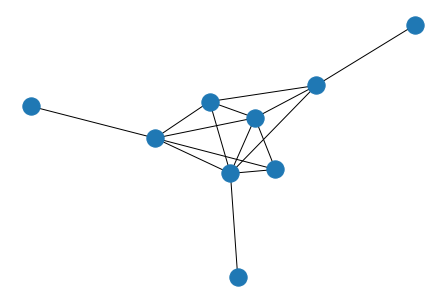

************
4
[4, 4, 6, 6, 1, 3, 5, 3, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 1 try
[4, 6, 2, 2, 5, 1, 5, 1, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 2 try
[2, 6, 2, 6, 3, 1, 5, 1, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 3 try
[2, 2, 4, 2, 5, 3, 5, 1, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 4 try
[4, 6, 6, 2, 3, 5, 1, 5, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 5 try
[2, 4, 2, 6, 5, 1, 5, 3, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 6 try
[4, 4, 6, 2, 1, 5, 3, 3, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 7 try
[4, 4, 6, 2, 3, 3, 1, 1, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 8 try
[6, 6, 2, 6, 1, 3, 1, 1, 3]
Oops! <class 'network

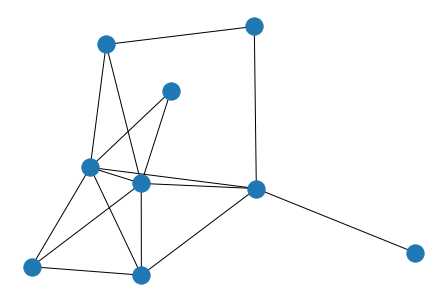

************
6
[6, 6, 6, 4, 2, 2, 5, 1, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 1 try
[2, 4, 4, 2, 4, 6, 5, 3, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 2 try
[4, 2, 2, 4, 4, 4, 1, 3, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 3 try
[6, 6, 6, 2, 6, 6, 5, 1, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 4 try
[2, 6, 2, 4, 2, 6, 5, 5, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 5 try
[6, 2, 6, 4, 6, 4, 5, 5, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 6 try
[2, 4, 6, 2, 2, 2, 3, 1, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 7 try
[6, 6, 4, 2, 6, 6, 1, 3, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 8 try
[4, 4, 2, 6, 6, 6, 5, 1, 5]
Oops! <class 'network

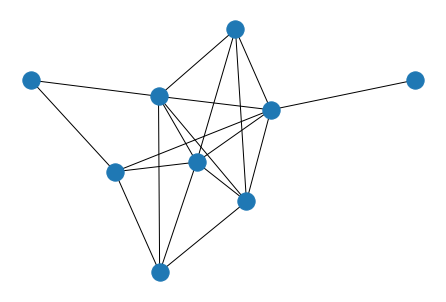

************
8
[4, 2, 6, 2, 6, 6, 4, 6, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 1 try
[2, 2, 6, 4, 2, 4, 4, 4, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 2 try
[2, 6, 2, 2, 6, 2, 2, 6, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 3 try
[2, 6, 2, 4, 2, 4, 2, 6, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 4 try
[6, 2, 6, 4, 4, 4, 2, 6, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 5 try
[2, 6, 2, 2, 6, 6, 6, 4, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 6 try
[2, 2, 6, 4, 6, 4, 2, 2, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 7 try
[4, 6, 4, 4, 6, 6, 6, 4, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 8 try
[2, 6, 6, 4, 2, 4, 2, 2, 1]
Oops! <class 'network

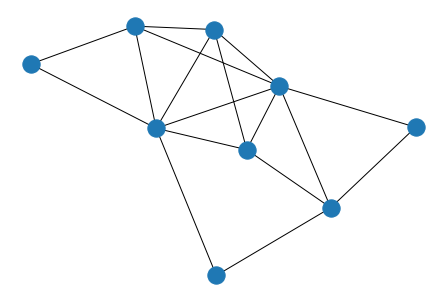

##############################################
10
************
0
[3, 1, 5, 5, 3, 3, 1, 3, 3, 5]


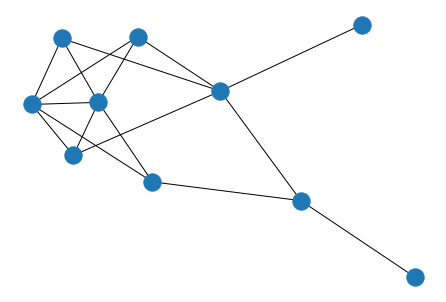

************
1
[4, 5, 1, 3, 5, 3, 5, 1, 5, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 1 try
[6, 5, 5, 5, 3, 5, 5, 1, 1, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 2 try
[6, 1, 1, 1, 5, 5, 1, 3, 5, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 3 try
[2, 3, 3, 3, 1, 5, 1, 3, 3, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 4 try
[2, 3, 1, 3, 5, 3, 3, 3, 3, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 5 try
[2, 5, 1, 3, 1, 1, 3, 5, 1, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 6 try
[2, 1, 1, 3, 3, 5, 5, 5, 5, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 7 try
[4, 5, 5, 5, 5, 1, 1, 1, 5, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 8 try
[6, 1, 3, 3, 3, 5, 3, 3, 

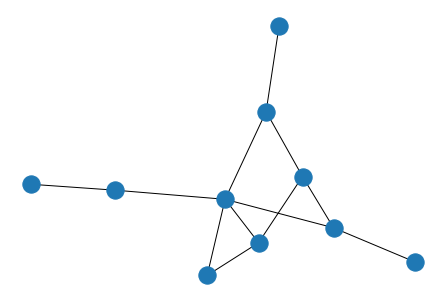

************
3
[6, 6, 6, 1, 1, 1, 3, 3, 1, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 1 try
[2, 4, 6, 5, 1, 3, 1, 5, 5, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 2 try
[4, 2, 2, 1, 1, 5, 1, 1, 1, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 3 try
[2, 4, 6, 5, 1, 5, 5, 1, 3, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 4 try
[2, 4, 6, 5, 1, 5, 3, 3, 3, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 5 try
[6, 4, 6, 1, 5, 5, 1, 1, 1, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 6 try
[2, 4, 2, 1, 1, 1, 5, 5, 1, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 7 try
[6, 2, 2, 3, 5, 5, 1, 3, 1, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 8 try
[2, 2, 6, 1, 1, 3, 5, 1, 

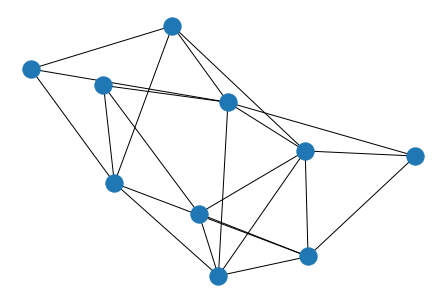

************
5
[2, 4, 2, 2, 6, 5, 5, 5, 5, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 1 try
[6, 6, 4, 2, 6, 3, 3, 5, 1, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 2 try
[6, 4, 2, 6, 6, 3, 1, 5, 1, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 3 try
[2, 6, 6, 4, 4, 1, 1, 1, 5, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 4 try
[6, 6, 6, 2, 4, 3, 5, 5, 3, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 5 try
[6, 2, 6, 4, 6, 5, 3, 1, 1, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 6 try
[6, 4, 6, 6, 4, 5, 1, 3, 5, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 7 try
[6, 2, 2, 2, 4, 3, 1, 5, 3, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 8 try
[6, 2, 6, 2, 2, 1, 5, 5, 

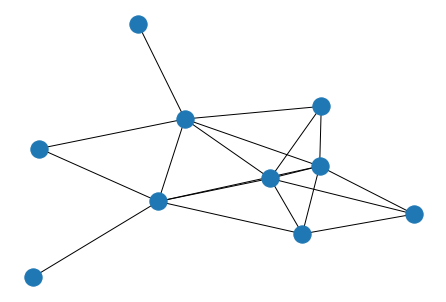

************
7
[4, 2, 2, 2, 6, 2, 2, 1, 5, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 1 try
[2, 2, 2, 6, 6, 2, 2, 1, 5, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 2 try
[2, 2, 4, 2, 6, 6, 6, 5, 5, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 3 try
[6, 4, 6, 2, 2, 6, 2, 1, 3, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 4 try
[6, 2, 6, 6, 6, 2, 6, 1, 5, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 5 try
[4, 4, 2, 4, 4, 6, 2, 1, 1, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 6 try
[6, 6, 2, 4, 4, 4, 4, 3, 1, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 7 try
[4, 4, 6, 6, 6, 2, 4, 1, 5, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 8 try
[6, 2, 2, 4, 6, 2, 2, 3, 

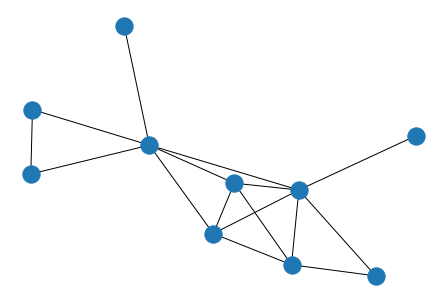

************
9
[6, 6, 2, 6, 4, 6, 4, 4, 4, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 1 try
[6, 2, 2, 2, 4, 6, 2, 6, 4, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 2 try
[4, 4, 6, 2, 2, 2, 6, 2, 6, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 3 try
[2, 2, 2, 2, 2, 6, 2, 6, 2, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 4 try
[2, 6, 2, 2, 6, 4, 6, 6, 6, 1]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 5 try
[4, 2, 2, 4, 2, 4, 2, 4, 2, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 6 try
[6, 4, 2, 4, 4, 2, 2, 6, 6, 5]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 7 try
[2, 6, 4, 6, 2, 4, 4, 4, 6, 3]
Oops! <class 'networkx.exception.NetworkXUnfeasible'> occurred.
Invalid Deg seq on 8 try
[2, 2, 6, 6, 6, 6, 2, 2, 

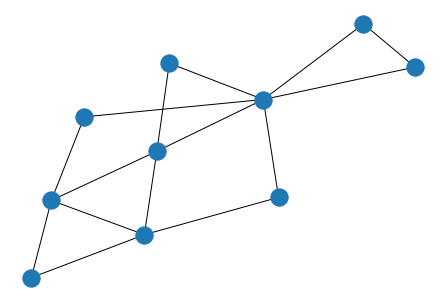

In [86]:
g_list = []

for d in range(2,11,1):
    print('##############################################')
    print(d)
    for n in range(0,d+1):
        print('************')
        print(n)
        
        ###### Will try 20 times for generating good degree sequence
        t = 0
        boolean = False
        while (not boolean) and t<20:
            t+=1
            try:
                deg_seq = generate_deg_seq(even_nodes = n, total_nodes = d)
                print(deg_seq)

                g = generate_random_graph(deg_seq, g_list)
                nx.draw(g)
                plt.show()
                g_list.append(g)
                boolean = True
            except:
                print("Oops!", sys.exc_info()[0], "occurred.")
                print('Invalid Deg seq on '+ str(t) + " try")

In [87]:
len(g_list)

33

In [88]:
def even_percent(graph):
  """
  Determines the relative percent of even degree nodes
  """
  nodes = graph.number_of_nodes()
  tot_ev = 0
  for i in range(nodes):
    if graph.degree[i]%2 == 0:
      tot_ev+=1
  return tot_ev/nodes

In [89]:
for g in g_list:
    print( even_percent(g))

0.0
0.3333333333333333
1.0
0.0
0.5
1.0
0.2
0.6
1.0
0.0
0.3333333333333333
0.6666666666666666
1.0
0.14285714285714285
0.42857142857142855
0.7142857142857143
1.0
0.0
0.25
0.5
0.75
1.0
0.1111111111111111
0.3333333333333333
0.5555555555555556
0.7777777777777778
1.0
0.0
0.2
0.4
0.6
0.8
1.0


In [90]:
listy = []
for g in g_list:
    print(g.number_of_nodes())
    listy.append(g.number_of_nodes())

2
3
3
4
4
4
5
5
5
6
6
6
6
7
7
7
7
8
8
8
8
8
9
9
9
9
9
10
10
10
10
10
10


In [91]:
listy 

[2,
 3,
 3,
 4,
 4,
 4,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10]

#### Storing these graphs

In [92]:

def graphs_to_matrix(g_list):
  """
  Converts graphs to matrices
  """
  mat_list = []
  for g in g_list:
    mat = nx.linalg.graphmatrix.adj_matrix(g, weight = None)
    mat = scipy.sparse.csr_matrix.toarray(mat)
    mat_list.append(np.copy(mat))
  return mat_list

In [93]:
new_mat_list = graphs_to_matrix(g_list)

Storing in textfile

In [94]:
a_file = open("SmallRandomGraphs.txt", "w")
for mat in new_mat_list:
    for row in mat:
        np.savetxt(a_file, row)
a_file.close()

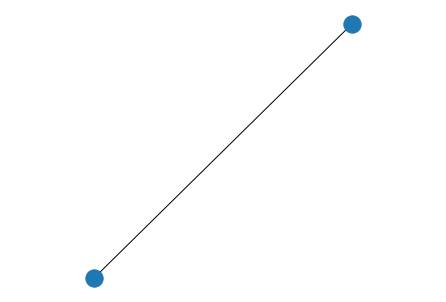

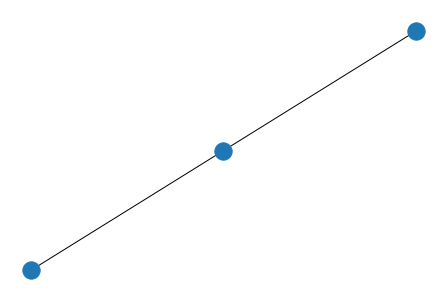

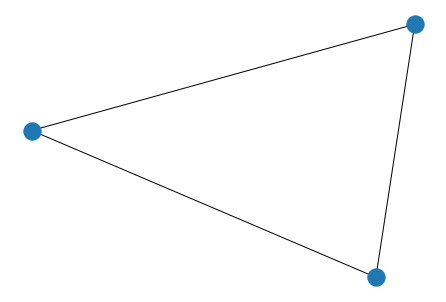

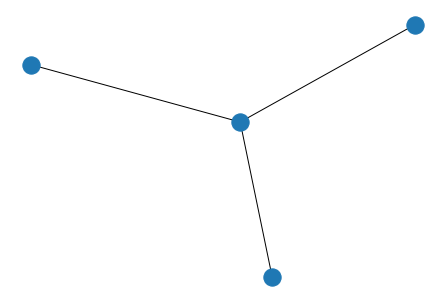

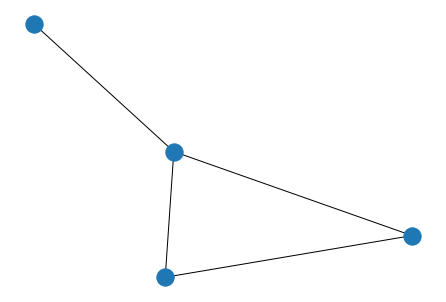

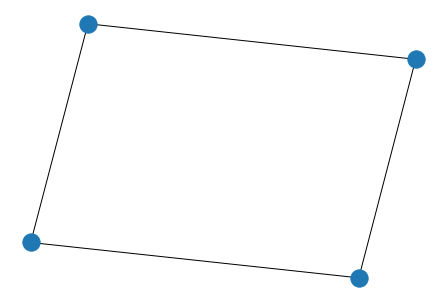

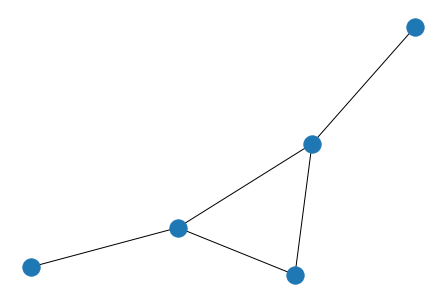

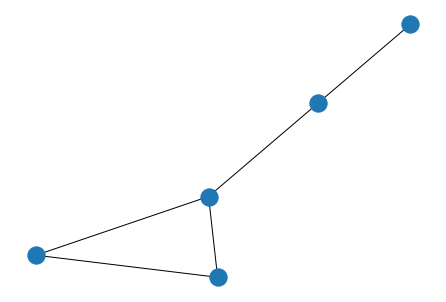

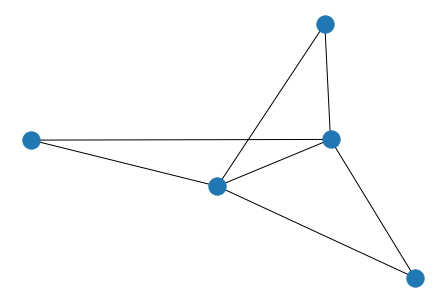

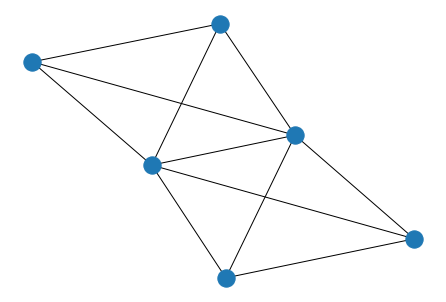

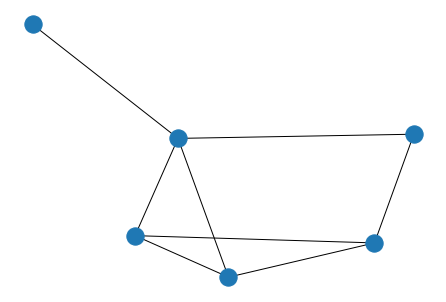

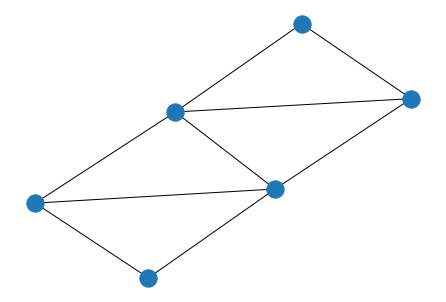

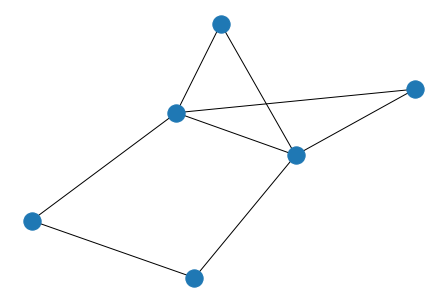

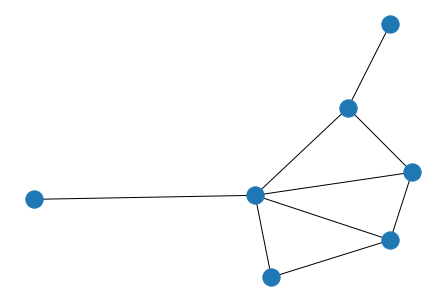

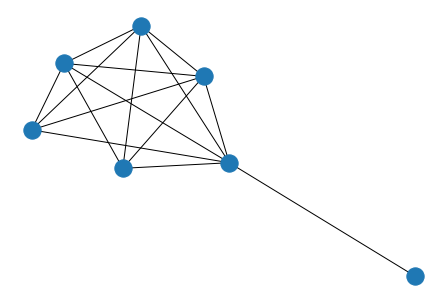

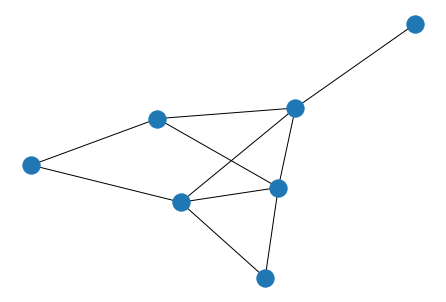

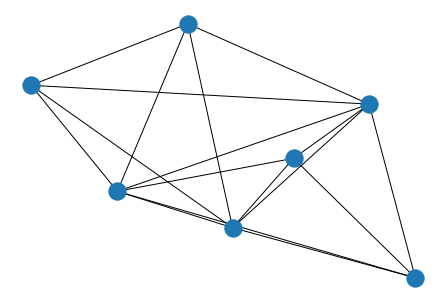

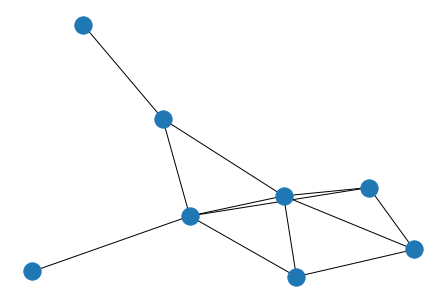

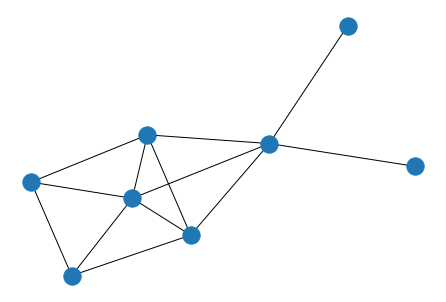

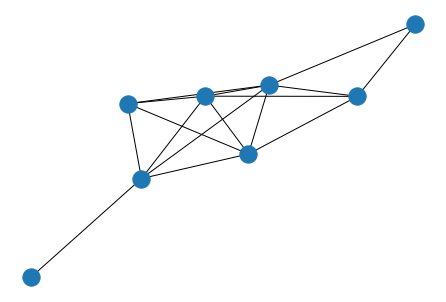

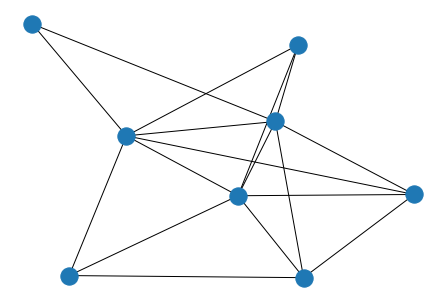

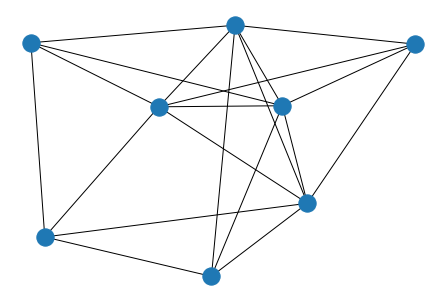

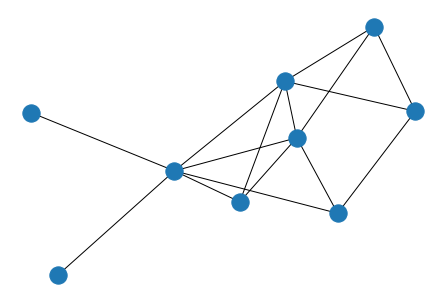

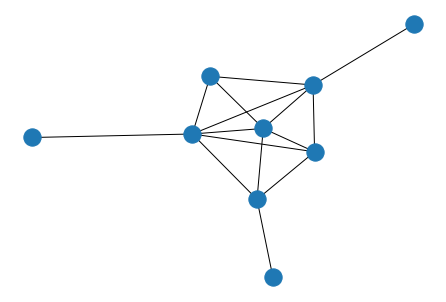

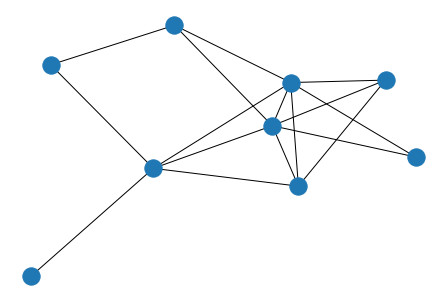

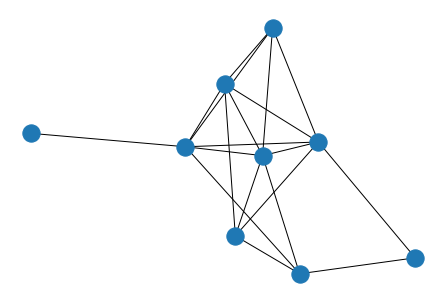

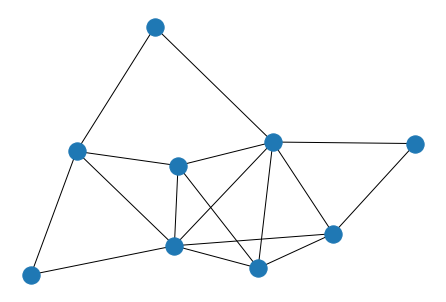

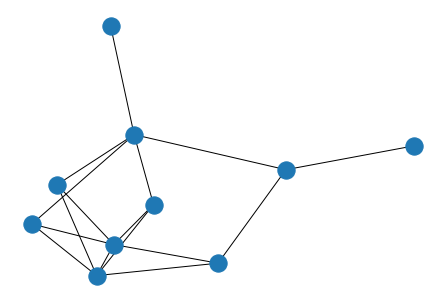

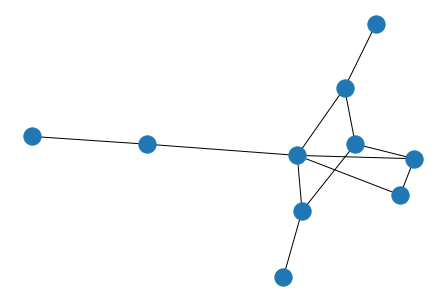

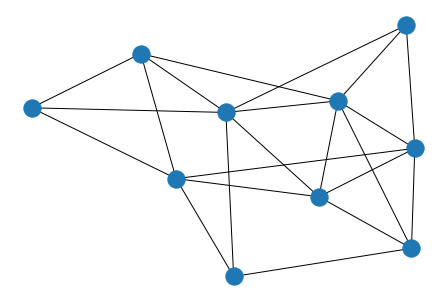

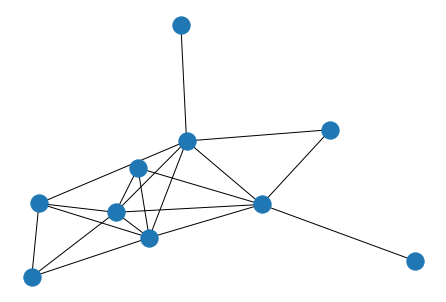

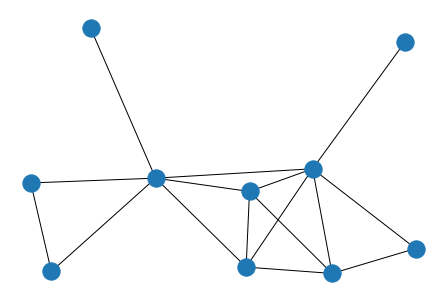

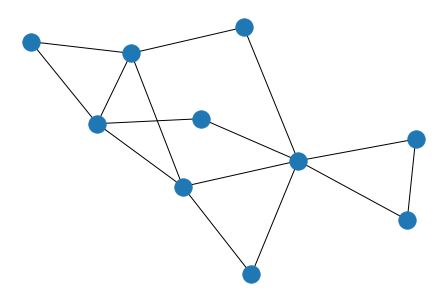

In [95]:
for g in g_list:
    nx.draw(g)
    plt.show()